 # Importing all the necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

#Loading the Data

In [3]:
data = pd.read_csv("/content/creditcard.csv")
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


#Understanding the Data

In [4]:
print(data.describe())

               Time            V1            V2            V3            V4  \
count  17918.000000  17918.000000  17918.000000  17918.000000  17918.000000   
mean   13905.276259     -0.244970      0.258166      0.777804      0.291614   
std     9867.916251      1.893161      1.508296      1.766872      1.479519   
min        0.000000    -30.552380    -40.978852    -31.103685     -5.172595   
25%     3781.250000     -0.959806     -0.305367      0.338327     -0.629972   
50%    12347.500000     -0.306803      0.235061      0.924255      0.230058   
75%    23775.000000      1.164015      0.876538      1.557391      1.155770   
max    29031.000000      1.960497     16.713389      4.101716     11.927512   

                 V5            V6            V7            V8            V9  \
count  17917.000000  17917.000000  17917.000000  17917.000000  17917.000000   
mean      -0.146329      0.099878     -0.150970      0.012969      0.734707   
std        1.423917      1.327756      1.342027    

#Describing the Data

#Imbalance in the data

In [5]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.004541376990356582
Fraud Cases: 81
Valid Transactions: 17836


#Print the amount details for Fraudulent Transaction

In [6]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


,Amount
count,81.000000
mean,98.105926
std,267.464067
min,0.000000
25%,1.000000
50%,1.000000
75%,99.990000
max,1809.680000


# Print the amount details for Normal Transaction

In [7]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


,Amount
count,17836.000000
mean,67.365025
std,188.754429
min,0.000000
25%,5.490000
50%,15.950000
75%,56.232500
max,7712.430000


#Plotting the Correlation Matrix

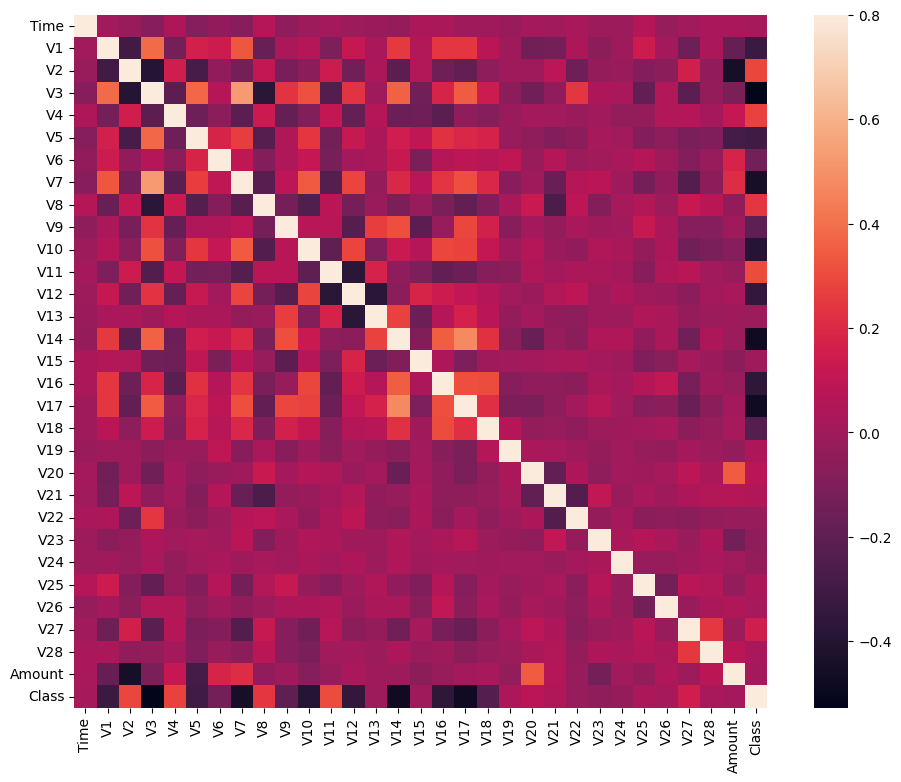

In [8]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

#Separating the X and the Y values

In [9]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(17918, 30)
(17918,)


In [38]:

# Count NaNs in a NumPy array
num_missing = np.isnan(yTrain).sum()
print("Missing labels:", num_missing)

Missing labels: 1


In [39]:
from sklearn.ensemble import RandomForestClassifier

# Create a boolean mask: True where yTrain is _not_ NaN
mask = ~np.isnan(yTrain)

# Filter both X and y
xTrain_clean = xTrain[mask]
yTrain_clean = yTrain[mask]

# Now fit without errors
rfc = RandomForestClassifier(random_state=42)
rfc.fit(xTrain_clean, yTrain_clean)

RandomForestClassifier(random_state=42)

#Training and Testing Data Bifurcation

In [33]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)



#Building a Random Forest Model using scikit learn

In [41]:
# 1. Identify which rows have valid labels
mask = ~np.isnan(yTrain)

# 2. Subset both feature and label arrays
xTrain_clean = xTrain[mask]
yTrain_clean = yTrain[mask]

# (Optional) Verify no NaNs remain:
print("NaNs in yTrain_clean:", np.isnan(yTrain_clean).sum())  # should print 0

# 3. Fit on the cleaned data
rfc = RandomForestClassifier(random_state=42)
rfc.fit(xTrain_clean, yTrain_clean)

# 4. Now you can predict and evaluate as usual:
yPred = rfc.predict(xTest)


NaNs in yTrain_clean: 0


In [35]:
from sklearn.impute import SimpleImputer
print("NaN values in yTest before imputation:", np.isnan(yTest).sum())

imputer = SimpleImputer(strategy='most_frequent')
yTest = imputer.fit_transform(yTest.reshape(-1, 1)).flatten()
print("NaN values in yTest after imputation:", np.isnan(yTest).sum())

NaN values in yTest before imputation: 0
NaN values in yTest after imputation: 0


# Building all kinds of evaluating parameters

In [36]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest classifier
The accuracy is 0.9986049107142857
The precision is 0.8823529411764706
The recall is 0.8333333333333334
The F1-Score is 0.8571428571428571
The Matthews correlation coefficient is0.856795687676577


#Visualizing the Confusion Matrix

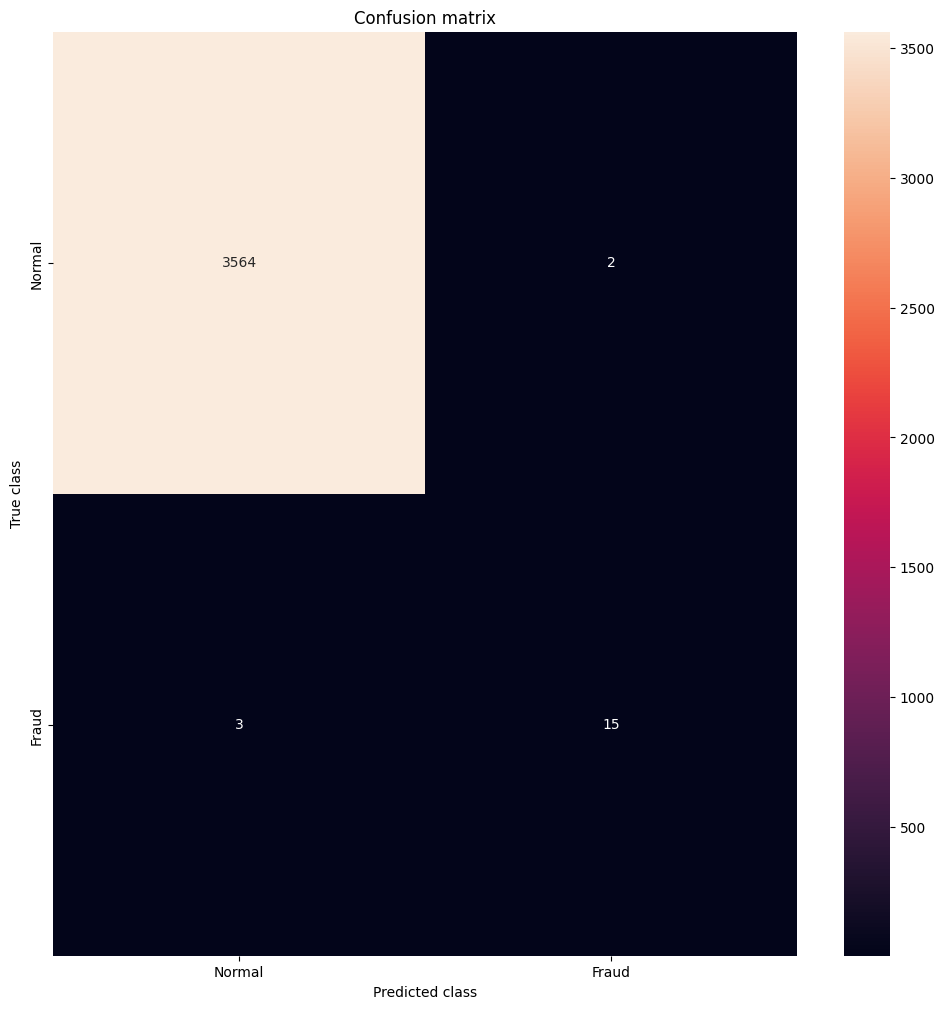

In [40]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()